In [10]:
from tensorflow import keras
model = keras.models.load_model('../models/deeplabv3.h5')


In [6]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

2023-01-11 02:35:53.879634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 02:35:54.200097: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-11 02:35:54.223678: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/bharathraj/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-11 02

In [7]:
def predict(image_path):
    image = tf.io.read_file(image_path) 
    image = tf.image.decode_bmp(image, channels=3)
    image = tf.image.resize(image, (256, 256))
    image = tf.cast(image, tf.float32) / 255.0
    predictions = model.predict(np.expand_dims((image), axis=0))
    predictions = np.squeeze(predictions)
    predictions = np.argmax(predictions, axis=2)
    pred_mask = predictions
    pred_mask = pred_mask.reshape(256,256,1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask))


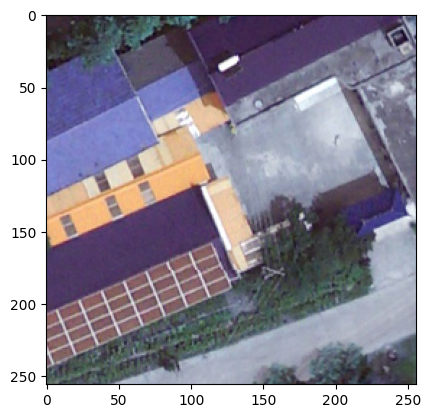

In [8]:
test = cv2.imread("../PV01/PV01_Rooftop_Brick/PV01_324942_1203842.bmp")
plt.imshow(test)

1/1 [==============================] - 1s 1s/step


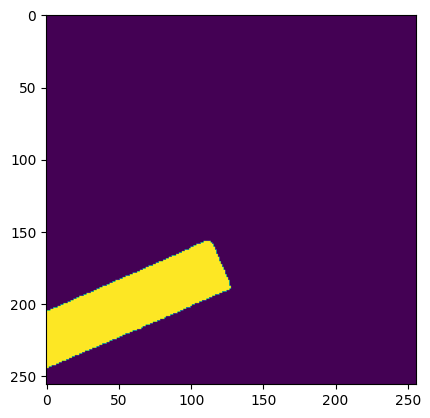

In [11]:
predict("../PV01/PV01_Rooftop_Brick/PV01_324942_1203842.bmp")

In [3]:
import os
import numpy as np

In [4]:
brick = "../PV01/PV01_Rooftop_Brick"
flatConcrete = "../PV01/PV01_Rooftop_FlatConcrete"
steelTile = "../PV01/PV01_Rooftop_SteelTile"



brick_paths = []
flatConcrete_paths = []
steelTile_paths = []

for root, dirs, files in os.walk(brick):
    for file in files:
        brick_paths.append(os.path.join(root, file))

for root, dirs, files in os.walk(flatConcrete):
    for file in files:
        flatConcrete_paths.append(os.path.join(root, file))

for root, dirs, files in os.walk(steelTile):
    for file in files:
        steelTile_paths.append(os.path.join(root, file))
     
brick_paths.sort()
flatConcrete_paths.sort()
steelTile_paths.sort()

brick_img, brick_label = [brick_paths[i] for i in range(0,len(brick_paths),2)], [brick_paths[i] for i in range(1,len(brick_paths),2)]
flatConcrete_img, flatConcrete_label = [flatConcrete_paths[i] for i in range(0,len(flatConcrete_paths),2)], [flatConcrete_paths[i] for i in range(1,len(flatConcrete_paths),2)]
steelTile_img, steelTile_label = [steelTile_paths[i] for i in range(0,len(steelTile_paths),2)], [steelTile_paths[i] for i in range(1,len(steelTile_paths),2)]

images = np.concatenate((brick_img, flatConcrete_img, steelTile_img))
masks = np.concatenate((brick_label,flatConcrete_label,steelTile_label  ))

In [13]:
images[0]

'../PV01/PV01_Rooftop_Brick/PV01_324942_1203839.bmp'

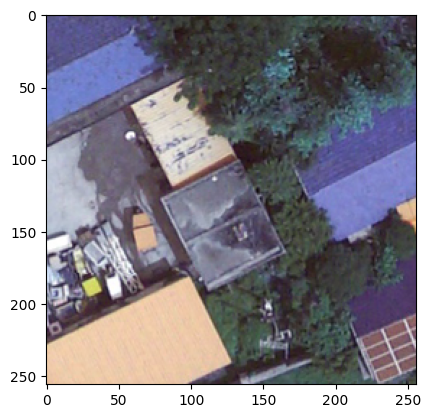

1/1 [==============================] - 0s 224ms/step


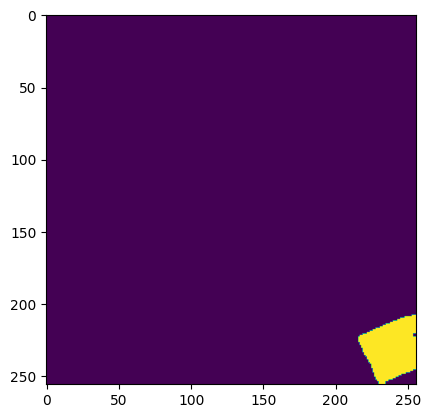

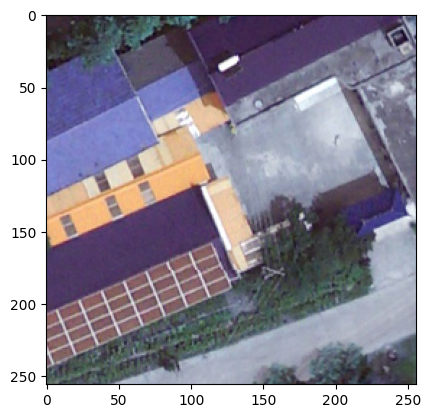

1/1 [==============================] - 0s 222ms/step


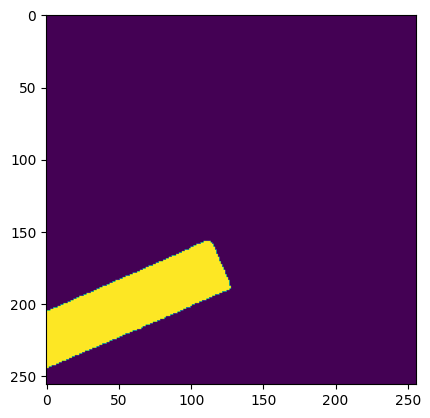

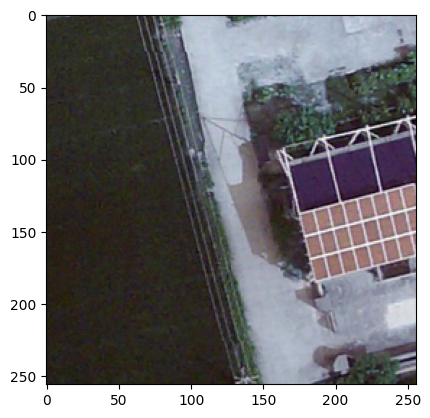

1/1 [==============================] - 0s 250ms/step


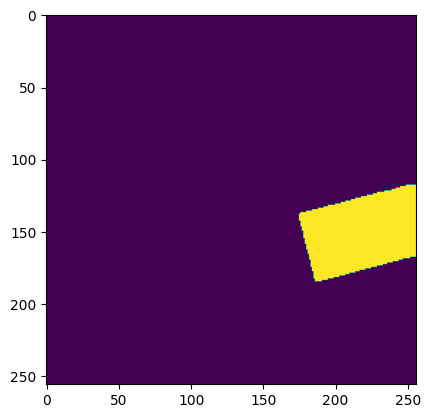

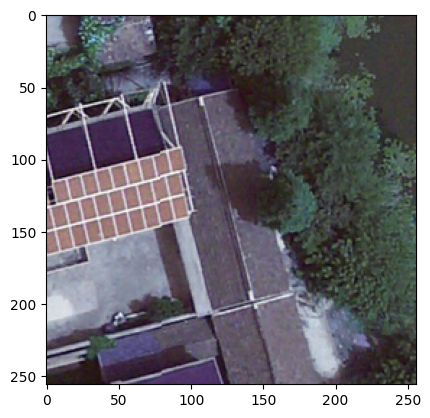

1/1 [==============================] - 0s 191ms/step


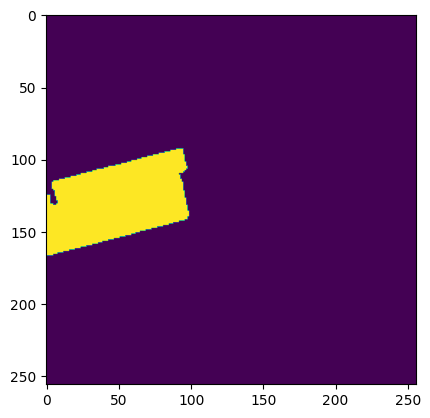

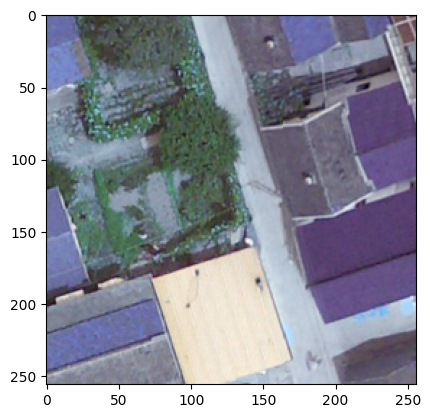

1/1 [==============================] - 0s 203ms/step


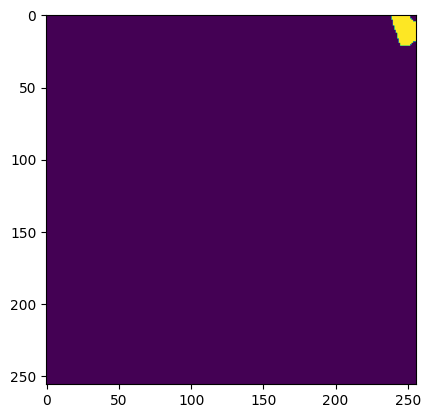

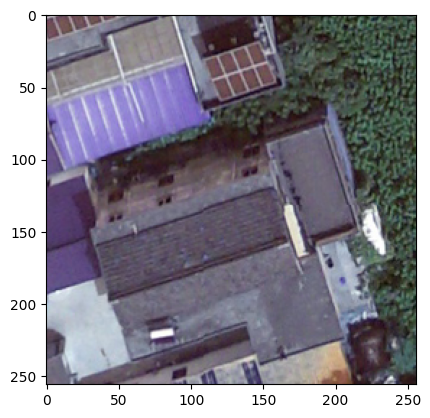

1/1 [==============================] - 0s 202ms/step


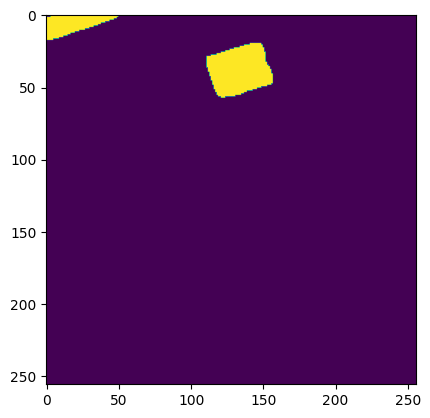

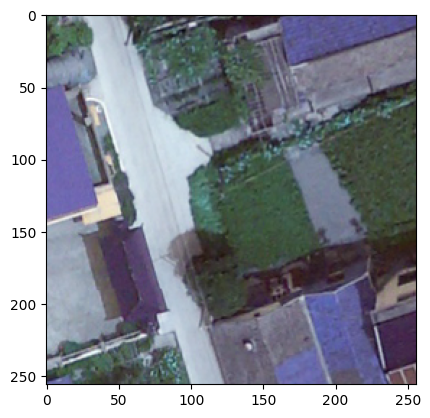

1/1 [==============================] - 0s 206ms/step


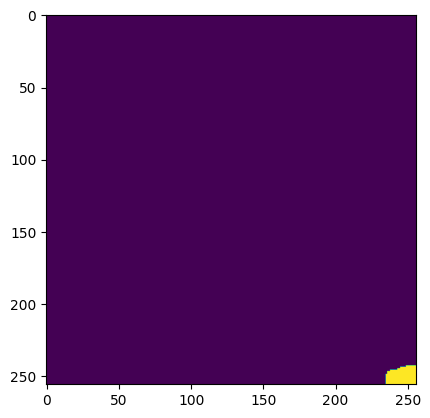

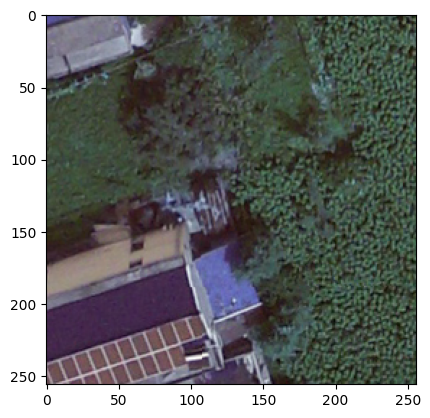

1/1 [==============================] - 0s 201ms/step


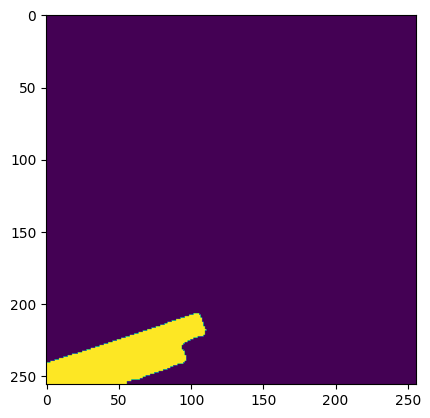

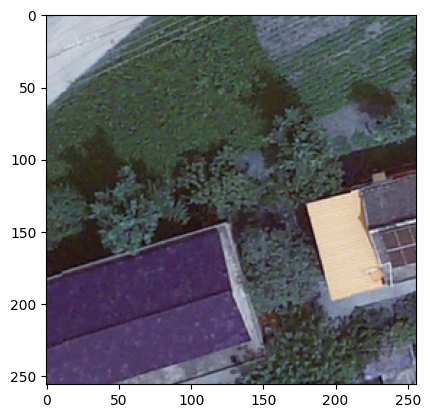

1/1 [==============================] - 0s 187ms/step


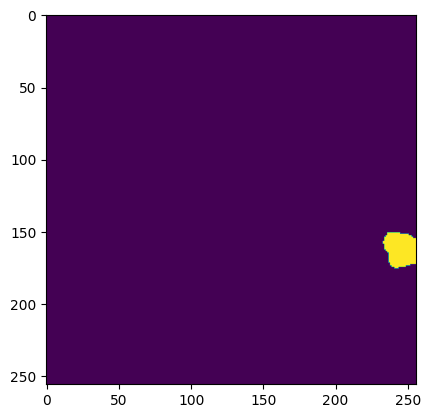

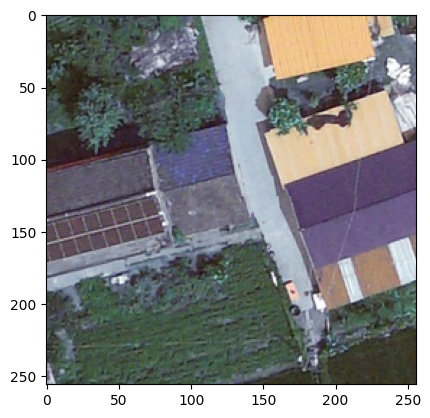

1/1 [==============================] - 0s 256ms/step


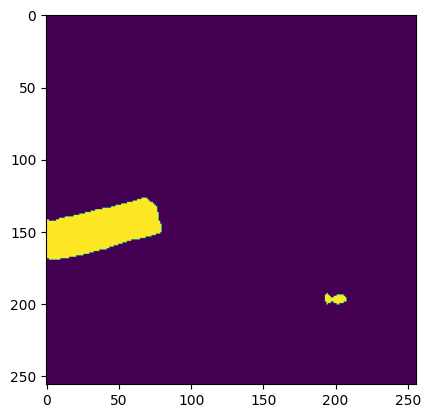

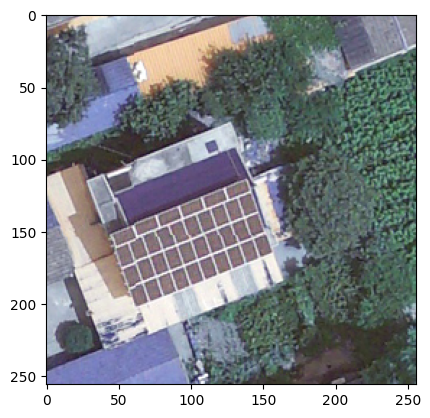

1/1 [==============================] - 0s 202ms/step


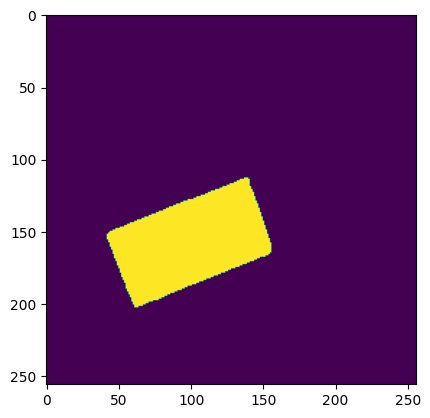

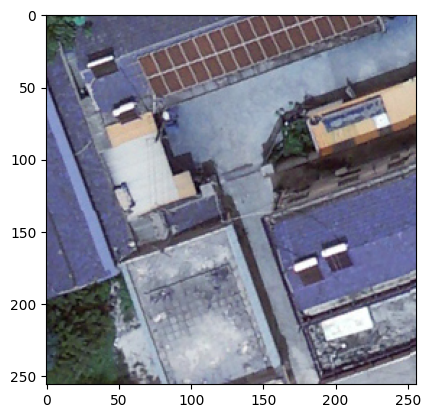

1/1 [==============================] - 2s 2s/step


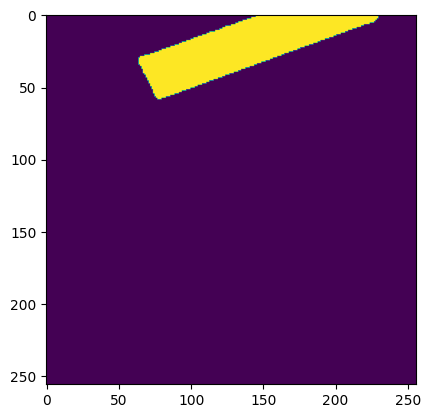

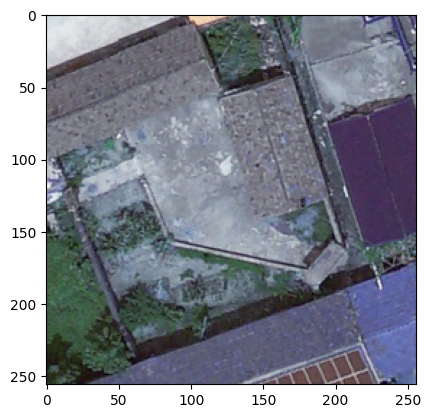

1/1 [==============================] - 0s 209ms/step


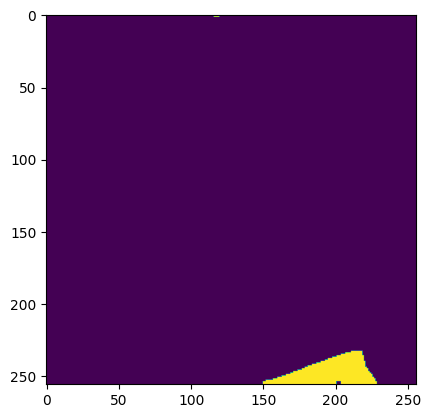

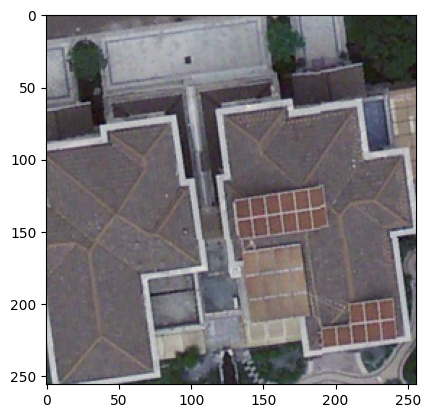

1/1 [==============================] - 0s 269ms/step


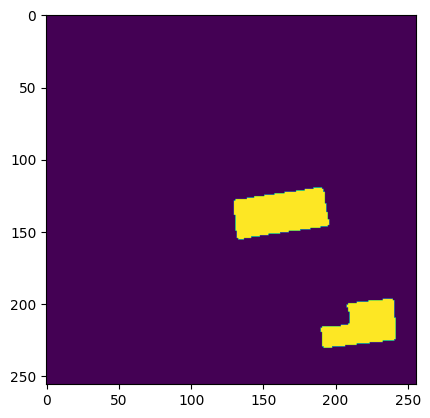

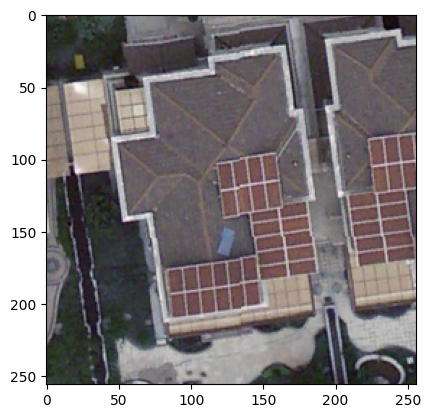

1/1 [==============================] - 0s 316ms/step


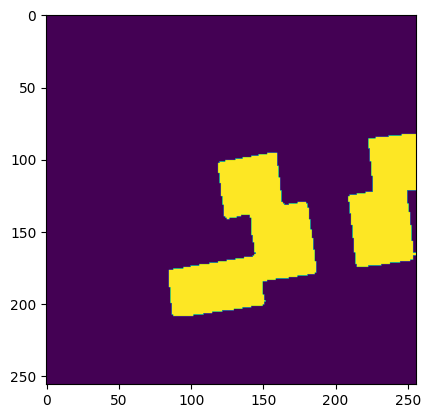

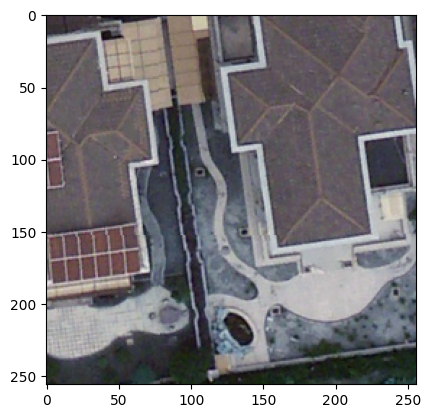

1/1 [==============================] - 0s 198ms/step


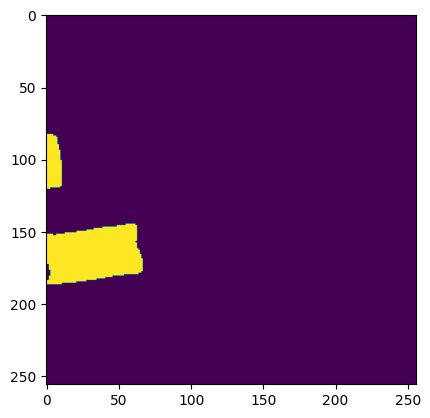

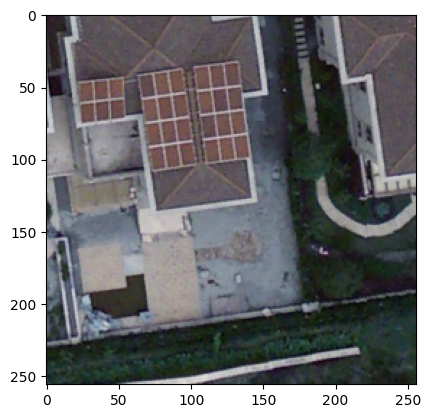

1/1 [==============================] - 0s 256ms/step


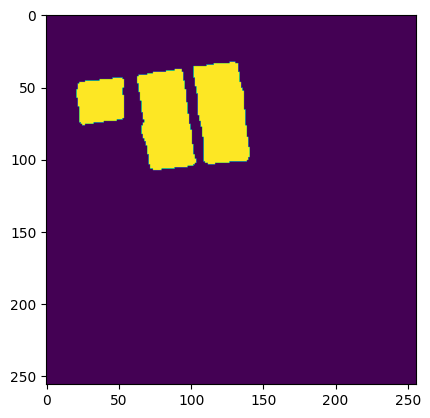

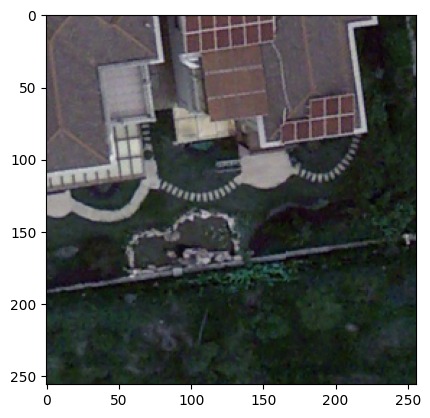

1/1 [==============================] - 0s 191ms/step


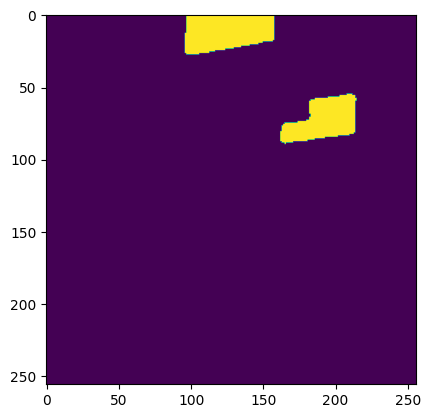

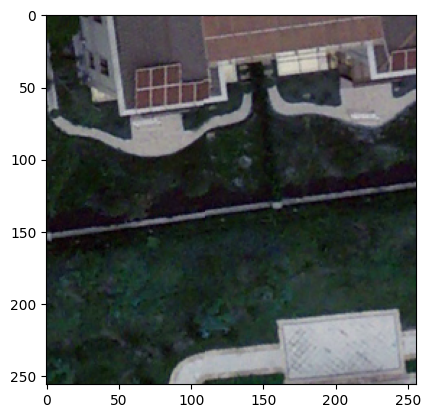

1/1 [==============================] - 0s 251ms/step


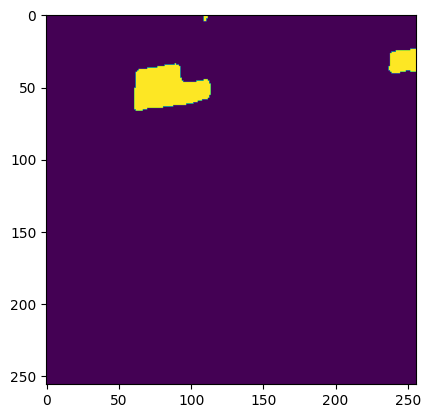

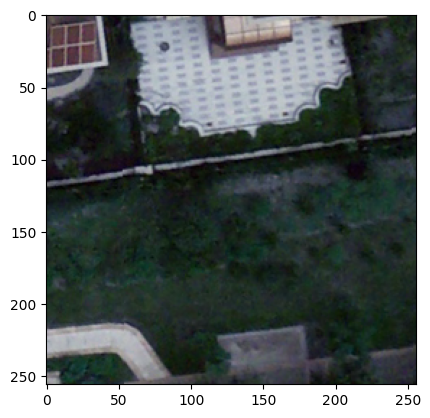

1/1 [==============================] - 0s 263ms/step


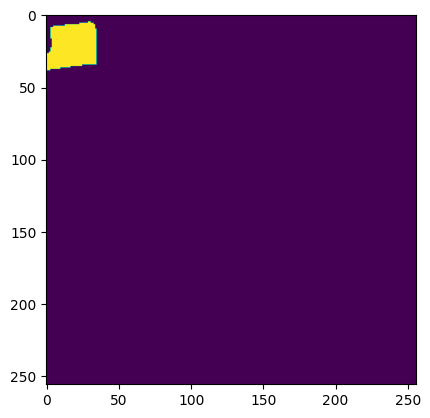

In [15]:
for i in images[:20]:
    test = cv2.imread(i)
    plt.imshow(test)
    plt.show()
    predict(i)
    plt.show()
